In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sc

In [38]:
data = pd.read_csv('SBAnational.csv')

C:\Users\gurin\AppData\Local\Temp\ipykernel_3400\1533426435.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('SBAnational.csv')


In [40]:
data.sample(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
729778,7593933003,"SEAN F MURPHY, CPA",FRANKLIN,MA,2038,ROCKLAND TRUST COMPANY,MA,0,20-Sep-94,1994,...,N,Y,NaN,31-Oct-94,"$30,000.00",$0.00,P I F,$0.00,"$30,000.00","$27,000.00"
506536,4902593009,L & M BLACK OXIDE SERVICES,BURBANK,CA,91502,CITY NATIONAL BANK,CA,332813,26-Jun-92,1992,...,N,N,NaN,31-Jul-92,"$200,000.00",$0.00,P I F,$0.00,"$200,000.00","$160,000.00"
895113,9904153002,"ELLIJAY APPLE BREAD, LLC",ELLIJAY,GA,30540,BRANCH BK. & TR CO,GA,311812,17-Jan-97,1997,...,N,Y,NaN,31-May-97,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$80,000.00"
865232,9324073006,"GUYWIRE COMMUNICATIONS, INC.",METAIRIE,LA,70005,GULF COAST BK & TR CO,LA,0,5-Jun-96,1996,...,N,N,NaN,31-May-97,"$250,000.00",$0.00,P I F,$0.00,"$250,000.00","$187,500.00"
814463,8729573007,"FAMILY TREE, INC., THE",KNOXVILLE,TN,37931,AREAWIDE DEVEL CORP,TN,0,23-Oct-95,1996,...,N,N,NaN,12-Jun-96,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$517,000.00"


In [41]:
data.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [45]:
data.info

<bound method DataFrame.info of         LoanNr_ChkDgt                            Name             City State  \
0          1000014003                  ABC HOBBYCRAFT       EVANSVILLE    IN   
1          1000024006     LANDMARK BAR & GRILLE (THE)        NEW PARIS    IN   
2          1000034009           WHITLOCK DDS, TODD M.      BLOOMINGTON    IN   
3          1000044001   BIG BUCKS PAWN & JEWELRY, LLC     BROKEN ARROW    OK   
4          1000054004     ANASTASIA CONFECTIONS, INC.          ORLANDO    FL   
...               ...                             ...              ...   ...   
899159     9995573004                    FABRIC FARMS  UPPER ARLINGTON    OH   
899160     9995603000                    FABRIC FARMS         COLUMBUS    OH   
899161     9995613003    RADCO MANUFACTURING CO.,INC.      SANTA MARIA    CA   
899162     9995973006           MARUTAMA HAWAII, INC.         HONOLULU    HI   
899163     9996003010  PACIFIC TRADEWINDS FAN & LIGHT           KAILUA    HI   

       

In [46]:
data.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [48]:
data['ChgOffDate']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
899159         NaN
899160         NaN
899161         NaN
899162    8-Mar-00
899163         NaN
Name: ChgOffDate, Length: 899164, dtype: object

In [50]:
data1 = data.drop('ChgOffDate', axis = 1)

In [51]:
data1.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'DisbursementDate', 'DisbursementGross', 'BalanceGross',
       'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [52]:
def transform_MIS(a):
    if a == 'P I F':
        return 1
    elif a == 'CHGOFF':
        return 0

In [53]:
data1['MIS_Status'] = data1['MIS_Status'].transform(transform_MIS)

In [60]:
data1 = data1.dropna()

In [61]:
data1.isna().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

In [62]:
data1['MIS_Status'] = data1['MIS_Status'].astype(int)

C:\Users\gurin\AppData\Local\Temp\ipykernel_3400\3900520806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['MIS_Status'] = data1['MIS_Status'].astype(int)


In [63]:
data1['MIS_Status'].value_counts()

MIS_Status
1    730199
0    156041
Name: count, dtype: int64

In [66]:
data1['FranchiseCode'].value_counts()

FranchiseCode
1        631412
0        203625
78760      3342
68020      1917
50564      1023
          ...  
83876         1
12545         1
68170         1
69145         1
15930         1
Name: count, Length: 2754, dtype: int64

In [68]:
def transform_FranchiseCode(a):
    if a == 0 or a == 1:
        return 0
    else:
        return 1

In [69]:
data1['FranchiseCode'] = data1['FranchiseCode'].transform(transform_FranchiseCode)

C:\Users\gurin\AppData\Local\Temp\ipykernel_3400\45636641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['FranchiseCode'] = data1['FranchiseCode'].transform(transform_FranchiseCode)


In [70]:
data1['FranchiseCode'].value_counts()

FranchiseCode
0    835037
1     51203
Name: count, dtype: int64

In [71]:
data1['FranchiseCode'] = data1['FranchiseCode'].astype(int)

C:\Users\gurin\AppData\Local\Temp\ipykernel_3400\4131837488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['FranchiseCode'] = data1['FranchiseCode'].astype(int)


In [78]:
data1['NAICS'].value_counts()

NAICS
0         198267
722110     27772
722211     19338
811111     14392
621210     13856
           ...  
331411         1
336414         1
311351         1
316212         1
514190         1
Name: count, Length: 1311, dtype: int64

In [79]:
def transform_NAICS(a):
    if a == 0:
        return 0
    else:
        return a//10000

In [80]:
data1['NAICS'] = data1['NAICS'].transform(transform_NAICS)

C:\Users\gurin\AppData\Local\Temp\ipykernel_3400\2666603370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['NAICS'] = data1['NAICS'].transform(transform_NAICS)


In [81]:
data1['NAICS'].value_counts()

NAICS
0     198267
44     83867
81     71754
72     67084
54     66951
23     65635
62     54633
42     48148
45     41895
33     37740
56     32114
48     19955
32     17709
71     14460
53     13457
31     11660
51     11220
52      9378
11      8868
61      6313
49      2180
21      1820
22       654
55       256
92       222
Name: count, dtype: int64

In [82]:
data1.shape

(886240, 26)

In [93]:
data1.isna().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                198267
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [94]:
data1 = data1.dropna()

In [95]:
data1.shape

(687973, 26)

In [96]:
data1.isna().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

In [97]:
data1.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                float64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int32
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status             int32
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [99]:
data1.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,MIS_Status
count,6.879730e+05,687973.000000,687973.000000,687973.000000,687973.000000,687973.00000,687973.000000,687973.000000,687973.000000,687973.000000,687973.000000
mean,4.658286e+09,53329.812586,51.103878,102.988891,9.865663,1.27603,2.172312,5.125434,0.050341,0.940198,0.797190
std,2.465154e+09,31349.220015,17.465120,74.786130,61.547739,0.44939,14.946943,20.727148,0.218647,0.590055,0.402093
min,1.000014e+09,0.000000,11.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.531175e+09,25507.000000,42.000000,60.000000,2.000000,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,4.302675e+09,55112.000000,51.000000,84.000000,4.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,6.634744e+09,83815.000000,62.000000,120.000000,9.000000,2.00000,2.000000,5.000000,0.000000,1.000000,1.000000
max,9.995613e+09,99999.000000,92.000000,569.000000,9999.000000,2.00000,5621.000000,9500.000000,1.000000,2.000000,1.000000


In [109]:
def transform_currency(a):
    a = a.replace("$","")
    a = a.replace(",","")
    return a

In [110]:
data1['BalanceGross'] = data1['BalanceGross'].transform(transform_currency)

C:\Users\gurin\AppData\Local\Temp\ipykernel_3400\2743896519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['BalanceGross'] = data1['BalanceGross'].transform(transform_currency)


In [111]:
data1['BalanceGross'] = data1['BalanceGross'].astype(float)

C:\Users\gurin\AppData\Local\Temp\ipykernel_3400\186187807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['BalanceGross'] = data1['BalanceGross'].astype(float)


In [112]:
data1['DisbursementGross'] = data1['DisbursementGross'].transform(transform_currency)
data1['GrAppv'] = data1['GrAppv'].transform(transform_currency)
data1['SBA_Appv'] = data1['SBA_Appv'].transform(transform_currency) 
data1['ChgOffPrinGr'] = data1['ChgOffPrinGr'].transform(transform_currency)

C:\Users\gurin\AppData\Local\Temp\ipykernel_3400\3537149936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['DisbursementGross'] = data1['DisbursementGross'].transform(transform_currency)
C:\Users\gurin\AppData\Local\Temp\ipykernel_3400\3537149936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['GrAppv'] = data1['GrAppv'].transform(transform_currency)
C:\Users\gurin\AppData\Local\Temp\ipykernel_3400\3537149936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [113]:
data1['DisbursementGross'] = data1['DisbursementGross'].astype('float')
data1['GrAppv'] = data1['GrAppv'].astype('float')
data1['SBA_Appv'] = data1['SBA_Appv'].astype('float')
data1['ChgOffPrinGr'] = data1['ChgOffPrinGr'].astype('float')

C:\Users\gurin\AppData\Local\Temp\ipykernel_3400\291270994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['DisbursementGross'] = data1['DisbursementGross'].astype('float')
C:\Users\gurin\AppData\Local\Temp\ipykernel_3400\291270994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['GrAppv'] = data1['GrAppv'].astype('float')
C:\Users\gurin\AppData\Local\Temp\ipykernel_3400\291270994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [115]:
data1.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                float64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int32
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status             int32
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

In [116]:
data1['ApprovalFY'] = data1['ApprovalFY'].astype(int)

C:\Users\gurin\AppData\Local\Temp\ipykernel_3400\2427946999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['ApprovalFY'] = data1['ApprovalFY'].astype(int)


In [117]:
data1['LowDoc'].value_counts()

LowDoc
N    619435
Y     66204
C       617
S       598
0       552
A       492
R        74
1         1
Name: count, dtype: int64

In [119]:
def transform_lowdoc(a):
    if a == 'Y':
        return 1
    elif a == 'N':
        return 0

In [120]:
data1['LowDoc'] = data1['LowDoc'].transform(transform_lowdoc)

C:\Users\gurin\AppData\Local\Temp\ipykernel_3400\1623637513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['LowDoc'] = data1['LowDoc'].transform(transform_lowdoc)


In [122]:
data1['LowDoc'].value_counts()

LowDoc
0.0    619435
1.0     66204
Name: count, dtype: int64

In [123]:
data1.isna().sum()

LoanNr_ChkDgt           0
Name                    0
City                    0
State                   0
Zip                     0
Bank                    0
BankState               0
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist                0
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr               0
LowDoc               2334
DisbursementDate        0
DisbursementGross       0
BalanceGross            0
MIS_Status              0
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
dtype: int64

In [124]:
data1 = data1.dropna()

In [125]:
data1.isna().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

In [127]:
data1.shape

(685639, 26)

In [128]:
data1['MIS_Status'].value_counts()

MIS_Status
1    546636
0    139003
Name: count, dtype: int64

In [129]:
data1['RevLineCr'].value_counts()

RevLineCr
N    265651
0    213490
Y    191968
T     14484
1        15
R        14
`         5
2         5
C         2
,         1
7         1
A         1
-         1
Q         1
Name: count, dtype: int64

In [130]:
def transform_rev(a):
    if a == 'Y':
        return 1
    elif a =='N':
        return 0
    elif a == 0:
        return 0
    elif a == 1:
        return 1


In [131]:
data1['RevLineCr'] = data1['RevLineCr'].transform(transform_rev)

C:\Users\gurin\AppData\Local\Temp\ipykernel_3400\314814003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['RevLineCr'] = data1['RevLineCr'].transform(transform_rev)


In [132]:
data1.isna().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr            228020
LowDoc                    0
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [134]:
data1 = data1.dropna()

In [135]:
data1.shape

(457619, 26)

In [138]:
data1.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                float64
ApprovalDate          object
ApprovalFY             int32
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int32
UrbanRural             int64
RevLineCr            float64
LowDoc               float64
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status             int32
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

In [139]:
data1['RevLineCr'] = data1['RevLineCr'].astype(int)
data1['LowDoc'] = data1['LowDoc'].astype(int)

In [140]:
data1.describe()

,LoanNr_ChkDgt,Zip,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
count,4.576190e+05,457619.000000,457619.000000,457619.000000,457619.000000,457619.000000,457619.000000,457619.000000,457619.000000,457619.000000,457619.00000,457619.000000,457619.000000,4.576190e+05,457619.000000,457619.000000,4.576190e+05,4.576190e+05,4.576190e+05
mean,4.288988e+09,52088.839808,49.861109,2003.016890,93.891117,9.915323,1.263184,1.904383,4.778420,0.031260,0.90059,0.419493,0.054967,1.724434e+05,4.404846,0.784937,1.292664e+04,1.545250e+05,1.174789e+05
std,2.417293e+09,31345.211297,17.455006,5.656123,68.427708,57.254776,0.443719,16.901417,15.688928,0.174019,0.60448,0.493477,0.227916,2.753099e+05,1921.119374,0.410867,5.807505e+04,2.615796e+05,2.144154e+05
min,1.000014e+09,0.000000,11.000000,1984.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000e+03,0.000000,0.000000,0.000000e+00,1.000000e+03,5.000000e+02
25%,2.256810e+09,22102.000000,42.000000,2000.000000,59.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,3.500000e+04,0.000000,1.000000,0.000000e+00,2.500000e+04,1.275000e+04
50%,3.696256e+09,53223.000000,48.000000,2005.000000,84.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000,7.600000e+04,0.000000,1.000000,0.000000e+00,5.000000e+04,3.500000e+04
75%,6.094618e+09,82414.000000,62.000000,2007.000000,90.000000,9.000000,2.000000,1.000000,5.000000,0.000000,1.00000,1.000000,0.000000,1.930000e+05,0.000000,1.000000,0.000000e+00,1.580000e+05,1.250000e+05
max,9.995613e+09,99999.000000,92.000000,2014.000000,527.000000,9999.000000,2.000000,5621.000000,4441.000000,1.000000,2.00000,1.000000,1.000000,1.144632e+07,996262.000000,1.000000,3.512596e+06,5.000000e+06,4.500000e+06


In [146]:
data1.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'DisbursementDate', 'DisbursementGross', 'BalanceGross',
       'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [154]:
columns_for_analysis = ['MIS_Status','NAICS','Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc','DisbursementGross', 'BalanceGross',
       'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']

In [155]:
corr_coeff = data1[columns_for_analysis].corr()

In [156]:
corr_coeff

,MIS_Status,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
MIS_Status,1.000000,-0.004650,0.339912,0.034126,-0.000902,0.007728,0.005954,0.025015,-0.158997,-0.095876,0.097349,0.127551,0.001200,-0.420242,0.139623,0.149643
NAICS,-0.004650,1.000000,0.081770,-0.016812,0.111301,0.010559,-0.004777,0.122215,0.021235,-0.039817,0.003236,-0.043384,-0.002499,0.001167,-0.025945,-0.021960
Term,0.339912,0.081770,1.000000,0.054699,-0.021694,0.061841,0.002698,0.053383,-0.231464,-0.396393,-0.021579,0.399621,0.002726,-0.056001,0.461460,0.496716
NoEmp,0.034126,-0.016812,0.054699,1.000000,-0.043165,0.056068,0.204545,0.009765,-0.041821,-0.047837,-0.014779,0.113076,-0.000063,0.007385,0.116822,0.117632
NewExist,-0.000902,0.111301,-0.021694,-0.043165,1.000000,0.019224,-0.075431,0.100980,0.026656,-0.097652,0.081135,-0.046153,0.001048,0.025369,-0.032692,-0.030779
CreateJob,0.007728,0.010559,0.061841,0.056068,0.019224,1.000000,0.129194,0.017487,0.010730,-0.020176,-0.027172,0.072019,-0.000195,0.015243,0.073030,0.088260
RetainedJob,0.005954,-0.004777,0.002698,0.204545,-0.075431,0.129194,1.000000,0.008585,0.077887,0.062921,-0.073455,0.125736,-0.000569,0.011141,0.106081,0.110072
FranchiseCode,0.025015,0.122215,0.053383,0.009765,0.100980,0.017487,0.008585,1.000000,0.003367,-0.081248,0.005548,0.070361,-0.000248,0.021563,0.084163,0.087916
UrbanRural,-0.158997,0.021235,-0.231464,-0.041821,0.026656,0.010730,0.077887,0.003367,1.000000,0.304519,-0.330367,-0.033692,0.002001,0.065737,-0.067189,-0.088162
RevLineCr,-0.095876,-0.039817,-0.396393,-0.047837,-0.097652,-0.020176,0.062921,-0.081248,0.304519,1.000000,-0.204102,-0.204945,-0.001707,-0.045185,-0.306747,-0.331878


In [157]:
data1.shape

(457619, 26)

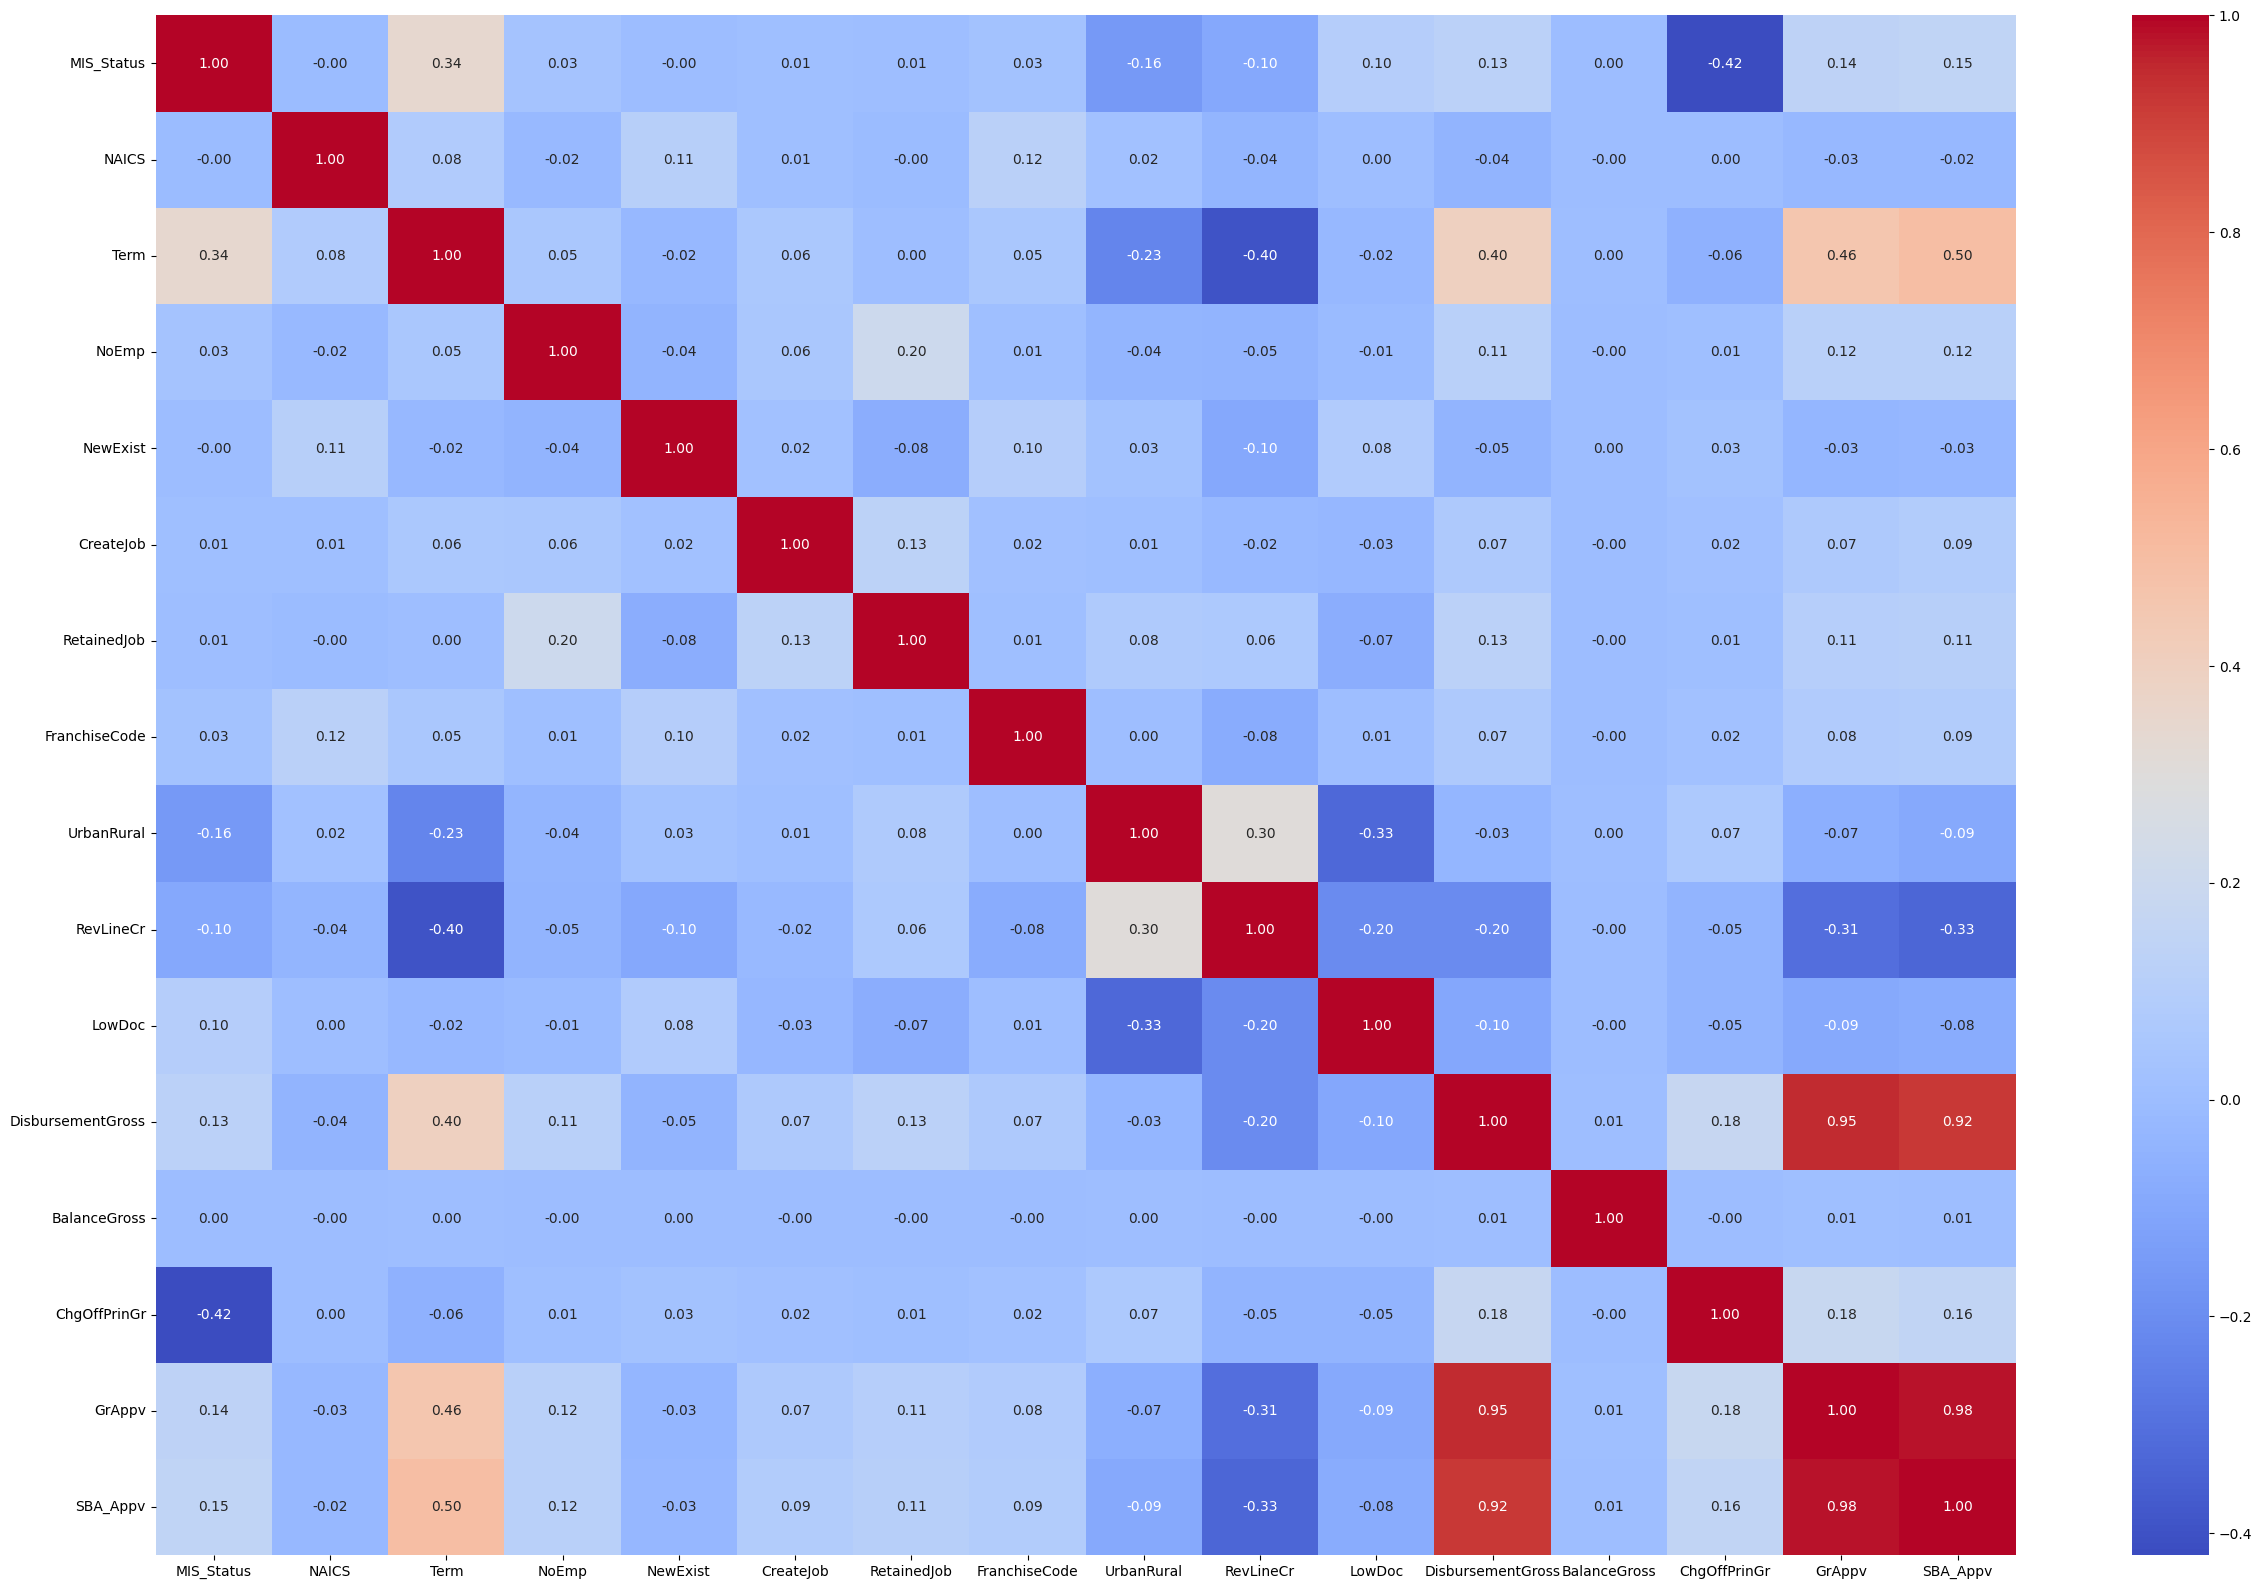

In [161]:
import seaborn as sns
plt.figure(figsize = (30,20))
sns.heatmap(corr_coeff, annot = True, cmap = 'coolwarm', fmt=".2f")
plt.show()

In [162]:
data1.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'DisbursementDate', 'DisbursementGross', 'BalanceGross',
       'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [164]:
log_reg_features = ['NAICS','Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc']
target = ['MIS_Status']

In [165]:
log_reg_X = data1[log_reg_features]
log_reg_y = data1[target]

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(log_reg_X, log_reg_y, test_size = 0.2, stratify = log_reg_y, random_state = 42)

In [173]:
X_test_logreg.shape

(91524, 10)

In [174]:
X_train_logreg.shape

(366095, 10)

In [175]:
from sklearn.linear_model import LogisticRegression

In [176]:
model_logreg = LogisticRegression()

In [177]:
model_logreg.fit(X_train_logreg, y_train_logreg)

D:\AllMyCode\ML\DataMiningProject\.venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\AllMyCode\ML\DataMiningProject\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [179]:
y_pred_logreg = model_logreg.predict(X_test_logreg)

In [187]:
from sklearn.metrics import recall_score

In [188]:
recall_logreg = recall_score(y_test_logreg, y_pred_logreg)

In [189]:
recall_logreg

0.9378488606784426

In [184]:
from sklearn.metrics import precision_score

In [185]:
precision_logreg = precision_score(y_test_logreg, y_pred_logreg)

In [186]:
precision_logreg

0.8338717063329991

In [190]:
from sklearn.metrics import classification_report 

In [191]:
classification_report_logreg = classification_report(y_test_logreg, y_pred_logreg)

In [193]:
print(classification_report_logreg)

              precision    recall  f1-score   support

           0       0.58      0.32      0.41     19683
           1       0.83      0.94      0.88     71841

    accuracy                           0.80     91524
   macro avg       0.71      0.63      0.65     91524
weighted avg       0.78      0.80      0.78     91524



In [194]:
forest_features = ['NAICS','Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc']

In [196]:
from sklearn.ensemble import RandomForestClassifier

In [197]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [198]:
rf_classifier.fit(X_train_logreg, y_train_logreg)

D:\AllMyCode\ML\DataMiningProject\.venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [202]:
y_pred_forest = rf_classifier.predict(X_test_logreg)

In [203]:
recall_forest = recall_score(y_test_logreg ,y_pred_forest)

In [204]:
recall_forest

0.9553597527874055

In [205]:
precision_forest = precision_score(y_test_logreg ,y_pred_forest)

In [206]:
precision_forest

0.9447472745292369

In [207]:
classification_report_forest = classification_report(y_test_logreg, y_pred_forest)

In [209]:
print(classification_report_forest)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81     19683
           1       0.94      0.96      0.95     71841

    accuracy                           0.92     91524
   macro avg       0.89      0.88      0.88     91524
weighted avg       0.92      0.92      0.92     91524

